In [1]:
from ultralytics import YOLO

In [2]:
model = YOLO('yolo12m-seg.yaml')

In [3]:
import yaml
from pathlib import Path

# === Словарь с конфигурацией YOLO ===
data_config = {
    'nc': 13,
    'train': 'C:/Users/maksk/Desktop/sliced_dataset/images/train',
    'val': 'C:/Users/maksk/Desktop/sliced_dataset/images/val',
    'names': {
        0: "пора",
        1: "включение",
        2: "подрез",
        3: "прожог",
        4: "трещина",
        5: "наплыв",
        6: "эталон1",
        7: "эталон2",
        8: "эталон3",
        9: "пора-скрытая",
        10: "утяжина",
        11: "несплавление",
        12: "непровар корня"
    }
}

# === Путь, куда сохранить YAML ===
config_path = Path("data.yaml")

# === Сохраняем в YAML ===
with open(config_path, 'w', encoding='utf-8') as f:
    yaml.dump(data_config, f, allow_unicode=True, sort_keys=False)

print(f"Файл data.yaml сохранён в: {config_path.resolve()}")

Файл data.yaml сохранён в: C:\Users\maksk\Untitled Folder 3\data.yaml


In [5]:
train_config = {
    'data': 'data.yaml',
    'imgsz': 704,
    'epochs': 100,
    'batch': 4,
    'device': 0,

    # Оптимизатор и обучение
    'optimizer': 'AdamW',
    'lr0': 0.0005,
    'lrf': 0.01,
    'warmup_epochs': 3.0,
    'warmup_momentum': 0.8,
    'warmup_bias_lr': 0.1,

    # Лоссы и маски
    'box': 7.0,
    'cls': 0.6,
    'dfl': 3.0,
    'mask_ratio': 2,
    'overlap_mask': False,

    # Аугментации
    'erasing': 0.0,
    'hsv_h': 0.0,
    'hsv_s': 0.0,
    'hsv_v': 0.1,
    'fliplr': 0.1,
    'degrees': 5.0,
    'scale': 0.05,
    'translate': 0.05,
    'mosaic': 0.0,
    'auto_augment': 'none',
    

    # Сохранение и логирование
    'save': True,
    'save_period': 2,
    'project': 'yolo_training',
    'name': 'yolo12m-last-chance',
    'exist_ok': True,
    'amp': False,
    'plots': True,
    'patience': 20,
    'cache': 'ram',
    'workers': 4,
}

train_config_path = Path('train_config.yaml')
with open(train_config_path, 'w') as f:
    yaml.dump(train_config, f, sort_keys=False)

In [6]:
results = model.train(**train_config)

New https://pypi.org/project/ultralytics/8.3.139 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.131  Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
engine\trainer: agnostic_nms=False, amp=False, augment=False, auto_augment=none, batch=4, bgr=0.0, box=7.0, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.6, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=5.0, deterministic=True, device=0, dfl=3.0, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.0, exist_ok=True, fliplr=0.1, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.0, hsv_s=0.0, hsv_v=0.1, imgsz=704, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=2, max_det=300, mixup=0.0, mode=train, model=yolo12m-seg.yaml, momentum=0.937, mosaic=0.0, multi_scale=False, name=yolo12m-last-chance, nbs=64, nms=False, opset=None, optim

train: Scanning C:\Users\maksk\Desktop\sliced_dataset\labels\train.cache... 21326 images, 7607 backgrounds, 0 corrupt: 


WARNING train: 43.8GB RAM required to cache images with 50% safety margin but only 9.1/15.7GB available, not caching images
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access  (ping: 0.10.0 ms, read: 179.254.1 MB/s, size: 170.8 KB)


val: Scanning C:\Users\maksk\Desktop\sliced_dataset\labels\val.cache... 5323 images, 1829 backgrounds, 0 corrupt: 100%|


WARNING val: 10.9GB RAM required to cache images with 50% safety margin but only 7.5/15.7GB available, not caching images
Plotting labels to yolo_training\yolo12m-last-chance\labels.jpg... 
optimizer: AdamW(lr=0.0005, momentum=0.937) with parameter groups 132 weight(decay=0.0), 143 weight(decay=0.0005), 142 bias(decay=0.0)
Image sizes 704 train, 704 val
Using 4 dataloader workers
Logging results to yolo_training\yolo12m-last-chance
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.64G     0.6024     0.8217      1.126      1.965          0        704: 100%|██████████| 5332/5332 [5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all       5323       9637      0.203      0.213      0.205      0.177      0.203      0.213      0.205      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.72G     0.4661      0.892     0.8031      1.402          2        704: 100%|██████████| 5332/5332 [4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all       5323       9637      0.434      0.222      0.262      0.215      0.431      0.222      0.261      0.213

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.75G      1.005      1.377      1.384      1.503          0        704: 100%|██████████| 5332/5332 [4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all       5323       9637      0.529      0.252      0.251      0.218      0.519       0.25       0.25      0.207

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.74G     0.9688      1.265      1.273      1.477          3        704: 100%|██████████| 5332/5332 [4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all       5323       9637      0.512      0.265      0.304      0.242      0.516      0.262      0.302      0.226

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.79G     0.9174       1.21      1.194      1.419         12        704: 100%|██████████| 5332/5332 [4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all       5323       9637      0.188      0.379      0.308      0.243      0.182      0.363      0.298      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.78G     0.9196      1.267      1.206      1.433          2        704: 100%|██████████| 5332/5332 [4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all       5323       9637       0.57      0.343      0.323       0.25      0.538      0.335      0.314      0.228

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.78G     0.9332      1.201      1.166      1.429          0        704: 100%|██████████| 5332/5332 [4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all       5323       9637      0.688      0.349      0.343       0.26      0.652      0.341      0.331      0.236

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.74G     0.9223      1.192      1.154      1.427          6        704: 100%|██████████| 5332/5332 [4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all       5323       9637      0.689      0.364       0.33      0.254      0.659      0.353      0.319      0.231

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.79G     0.9115      1.237      1.151       1.41          1        704: 100%|██████████| 5332/5332 [4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all       5323       9637      0.555      0.285       0.31      0.249      0.512      0.277        0.3      0.223

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.77G     0.8914      1.151      1.109      1.404          2        704: 100%|██████████| 5332/5332 [4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all       5323       9637      0.703       0.36      0.354      0.264      0.695      0.333      0.335      0.238

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.78G     0.9123      1.239      1.123      1.406          1        704: 100%|██████████| 5332/5332 [4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all       5323       9637      0.621      0.362       0.32       0.25      0.589      0.353      0.305      0.224

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.76G     0.9529      1.242      1.157        1.4          4        704: 100%|██████████| 5332/5332 [4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all       5323       9637      0.585      0.356      0.351      0.262      0.549      0.344      0.337      0.232

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.76G      1.035      1.234      1.257       1.44         10        704:  13%|█▎        | 672/5332 [05


KeyboardInterrupt: 

In [8]:
model = YOLO("Untitled Folder 3/yolo_training/yolo12m-last-chance/weights/last.pt") 

FileNotFoundError: [Errno 2] No such file or directory: 'Untitled Folder 3\\yolo_training\\yolo12m-last-chance\\weights\\last.pt'

In [4]:
!pip install psutil

In [5]:
import psutil

# Получаем информацию о памяти
mem = psutil.virtual_memory()

# Выводим доступную и общую память в гигабайтах
available_gb = mem.available / (1024 ** 3)
total_gb = mem.total / (1024 ** 3)

print(f"Доступно: {available_gb:.2f} ГБ из {total_gb:.2f} ГБ")

Доступно: 9.26 ГБ из 15.71 ГБ


In [12]:
import multiprocessing
print(multiprocessing.cpu_count())

20


In [13]:
import psutil
mem = psutil.virtual_memory()
print(f"Доступно: {mem.available / 1024 ** 3:.2f} GB")

Доступно: 1.28 GB


In [10]:
ckpt_path = Path("yolo_training/yolo12m-last-chance/weights/last.pt")
model = YOLO(str(ckpt_path))

In [ ]:
results = model.train(resume=True, box=0.05, mask_ratio=3)

New https://pypi.org/project/ultralytics/8.3.139 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.131  Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
engine\trainer: agnostic_nms=False, amp=False, augment=False, auto_augment=none, batch=4, bgr=0.0, box=7.0, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.6, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=5.0, deterministic=True, device=0, dfl=3.0, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.0, exist_ok=True, fliplr=0.1, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.0, hsv_s=0.0, hsv_v=0.1, imgsz=704, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=2, max_det=300, mixup=0.0, mode=train, model=yolo_training\yolo12m-last-chance\weights\last.pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=yolo12m-last-chance, nbs

train: Scanning C:\Users\maksk\Desktop\sliced_dataset\labels\train.cache... 21326 images, 7607 backgrounds, 0 corrupt: 


WARNING train: 43.8GB RAM required to cache images with 50% safety margin but only 4.4/15.7GB available, not caching images
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access  (ping: 0.10.0 ms, read: 156.159.1 MB/s, size: 170.8 KB)


val: Scanning C:\Users\maksk\Desktop\sliced_dataset\labels\val.cache... 5323 images, 1829 backgrounds, 0 corrupt: 100%|


WARNING val: 10.9GB RAM required to cache images with 50% safety margin but only 3.2/15.7GB available, not caching images
Plotting labels to yolo_training\yolo12m-last-chance\labels.jpg... 
optimizer: AdamW(lr=0.0005, momentum=0.937) with parameter groups 132 weight(decay=0.0), 143 weight(decay=0.0005), 142 bias(decay=0.0)
Resuming training yolo_training\yolo12m-last-chance\weights\last.pt from epoch 13 to 100 total epochs
Image sizes 704 train, 704 val
Using 4 dataloader workers
Logging results to yolo_training\yolo12m-last-chance
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.77G     0.8646      1.114      1.071      1.404          0        704: 100%|██████████| 5332/5332 [4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


image 1/1 C:\Users\maksk\Desktop\sliced_dataset\images\train\15-050-ls-1-11ra-0xkh_tile_x30780.jpg: 896x896 (no detections), 66.5ms
Speed: 26.8ms preprocess, 66.5ms inference, 2.5ms postprocess per image at shape (1, 3, 896, 896)


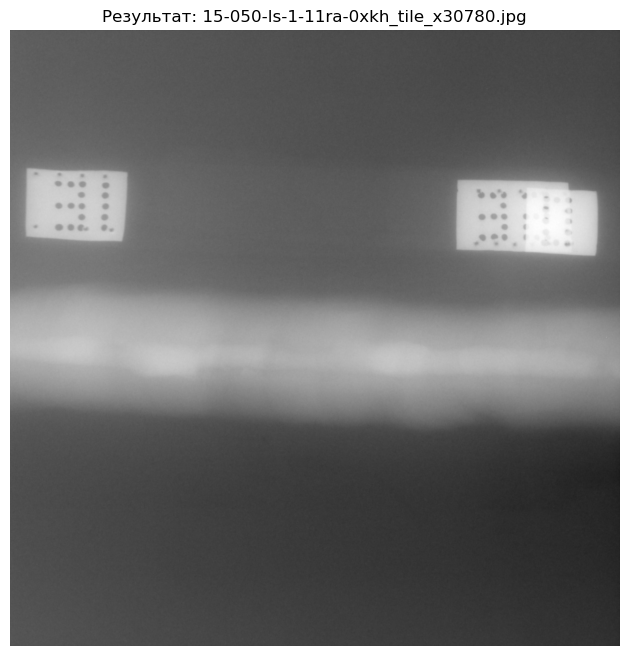


image 1/1 C:\Users\maksk\Desktop\sliced_dataset\images\train\sod23-ls-1-d01_tile_x07980.jpg: 896x896 (no detections), 70.3ms
Speed: 13.3ms preprocess, 70.3ms inference, 2.4ms postprocess per image at shape (1, 3, 896, 896)


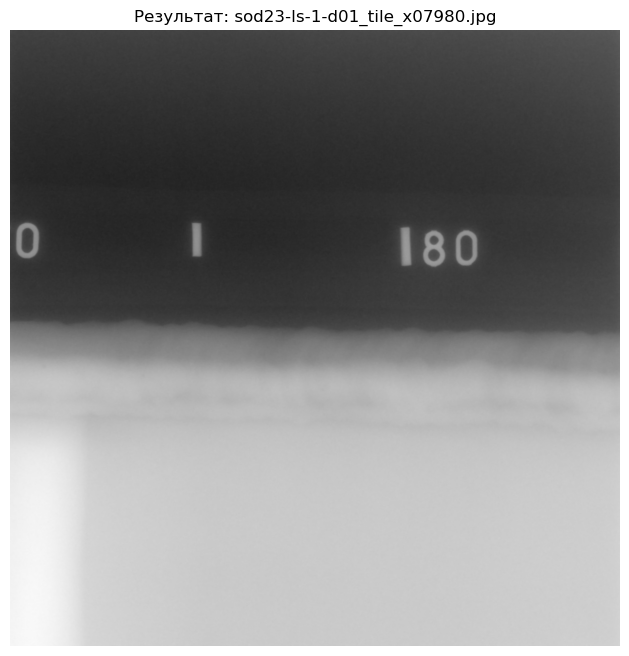


image 1/1 C:\Users\maksk\Desktop\sliced_dataset\images\train\1900-b1-14-d01_tile_x11400.jpg: 896x896 (no detections), 72.2ms
Speed: 16.9ms preprocess, 72.2ms inference, 3.3ms postprocess per image at shape (1, 3, 896, 896)


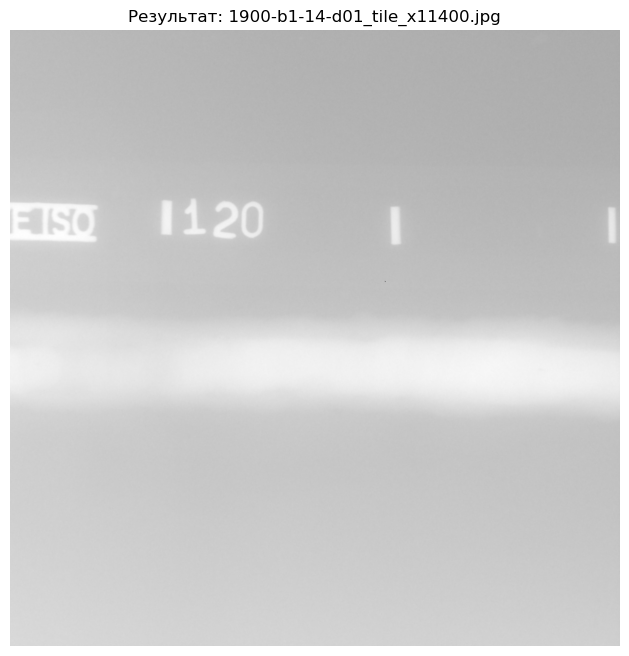


image 1/1 C:\Users\maksk\Desktop\sliced_dataset\images\train\18-110-ls-34-g01_tile_x01140.jpg: 896x896 1 1, 73.4ms
Speed: 16.2ms preprocess, 73.4ms inference, 18.5ms postprocess per image at shape (1, 3, 896, 896)


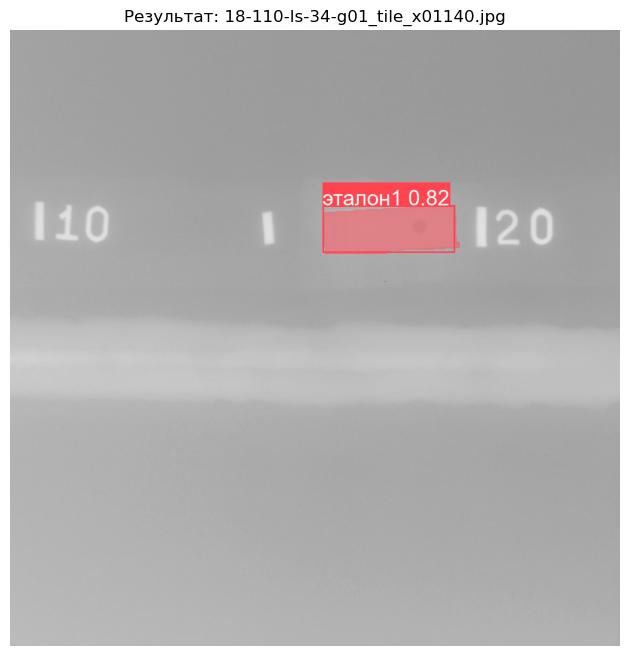


image 1/1 C:\Users\maksk\Desktop\sliced_dataset\images\train\3020-b1-14-h01_tile_x26220.jpg: 896x896 1 , 91.4ms
Speed: 7.3ms preprocess, 91.4ms inference, 14.3ms postprocess per image at shape (1, 3, 896, 896)


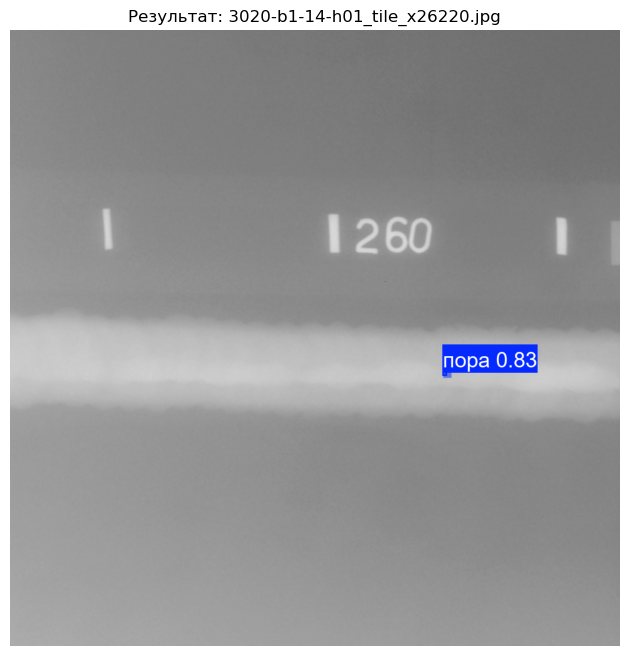


image 1/1 C:\Users\maksk\Desktop\sliced_dataset\images\train\19-150-ls-14-h02_tile_x28500.jpg: 896x896 1 , 88.9ms
Speed: 16.8ms preprocess, 88.9ms inference, 16.2ms postprocess per image at shape (1, 3, 896, 896)


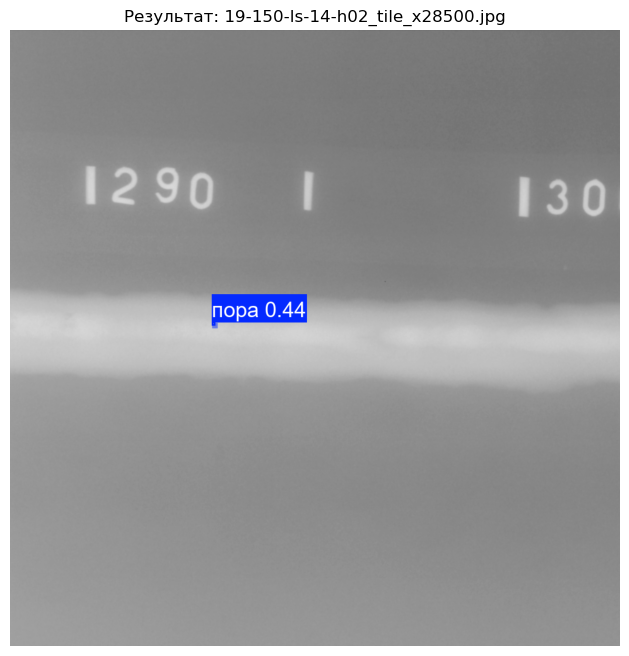


image 1/1 C:\Users\maksk\Desktop\sliced_dataset\images\train\10-180-ls-34-b-01_tile_x25080.jpg: 896x896 (no detections), 81.8ms
Speed: 19.1ms preprocess, 81.8ms inference, 10.3ms postprocess per image at shape (1, 3, 896, 896)


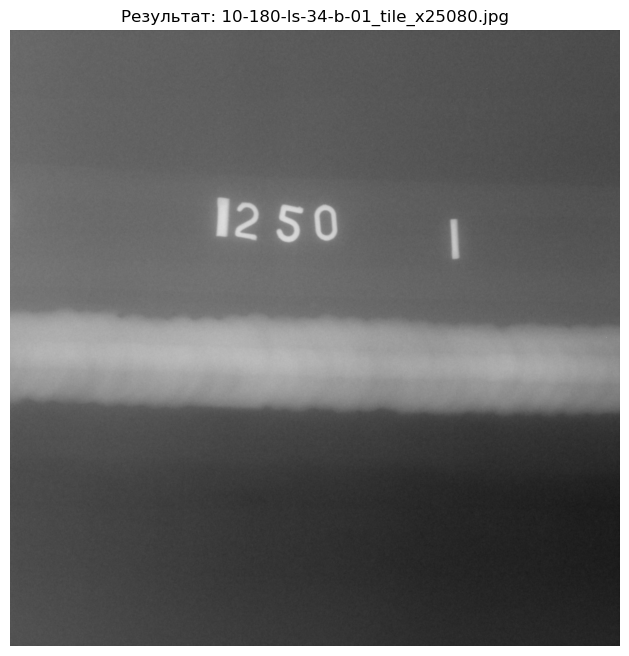


image 1/1 C:\Users\maksk\Desktop\sliced_dataset\images\train\1850-b1-14-h01_tile_x21660.jpg: 896x896 1 , 79.6ms
Speed: 18.7ms preprocess, 79.6ms inference, 13.2ms postprocess per image at shape (1, 3, 896, 896)


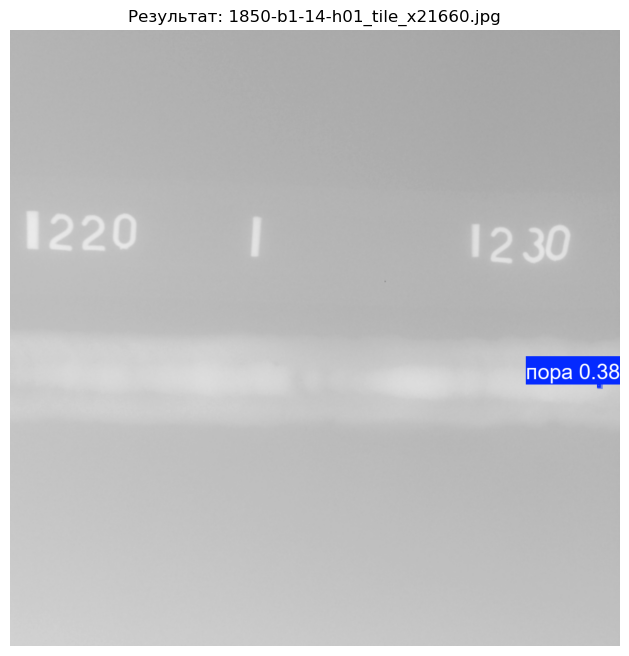


image 1/1 C:\Users\maksk\Desktop\sliced_dataset\images\train\3020-b1-14-h01_tile_x00000.jpg: 896x896 (no detections), 79.8ms
Speed: 7.7ms preprocess, 79.8ms inference, 2.4ms postprocess per image at shape (1, 3, 896, 896)


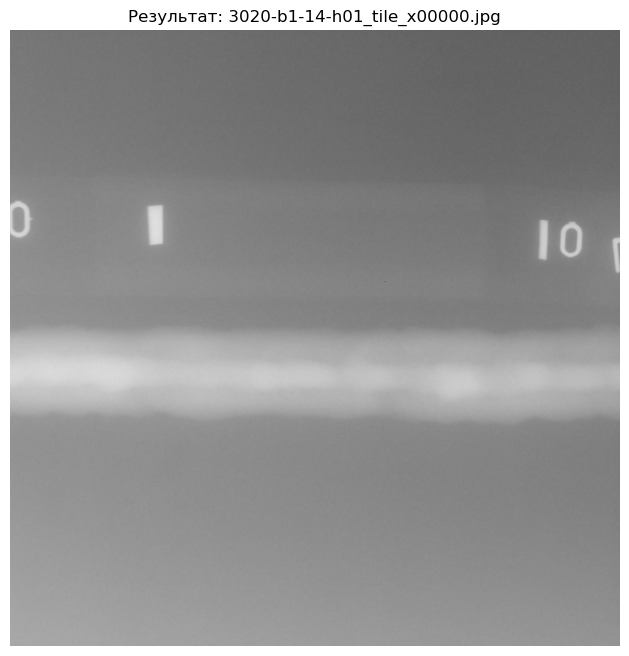


image 1/1 C:\Users\maksk\Desktop\sliced_dataset\images\train\19-180-r1-ls-1-18aa_tile_x11400.jpg: 896x896 (no detections), 72.4ms
Speed: 17.0ms preprocess, 72.4ms inference, 3.5ms postprocess per image at shape (1, 3, 896, 896)


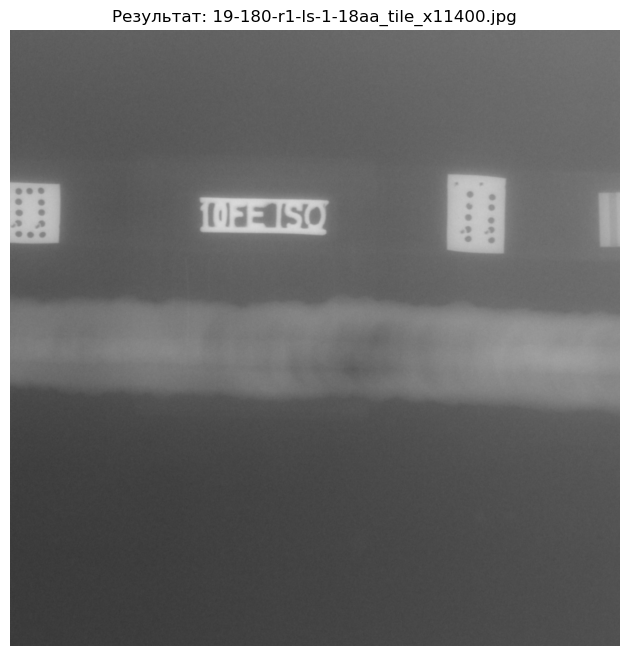

In [36]:
%matplotlib inline
from ultralytics import YOLO
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import random

# === Загрузка модели ===
model = YOLO("yolo_training/yolo12m-last-chance/weights/best_from_kaggle.pt")

# === Папка с изображениями ===
image_dir = Path('C:/Users/maksk/Desktop/sliced_dataset/images/train')  # <-- укажи путь к своим изображениям
image_paths = list(image_dir.glob("*.jpg"))


random_images = random.sample(image_paths, k=10)


for image_path in random_images:
    results = model(image_path)  
    im_pred = results[0].plot() 

  
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(im_pred, cv2.COLOR_BGR2RGB))
    plt.title(f"Результат: {image_path.name}")
    plt.axis("off")
    plt.show()